# <div class="alert alert-block alert-info"><center>Content Based Image Retrieval</center>
## <div class="alert alert-block alert-success"><center>Group 22</center>
### <div class="alert alert-block alert-warning"><center>SAHMA ANWAR(IIT2018074) <br> HARSHIT KUMAR(IIT2018075) <br> MILIND KHATRI(IIT2018082)</center>

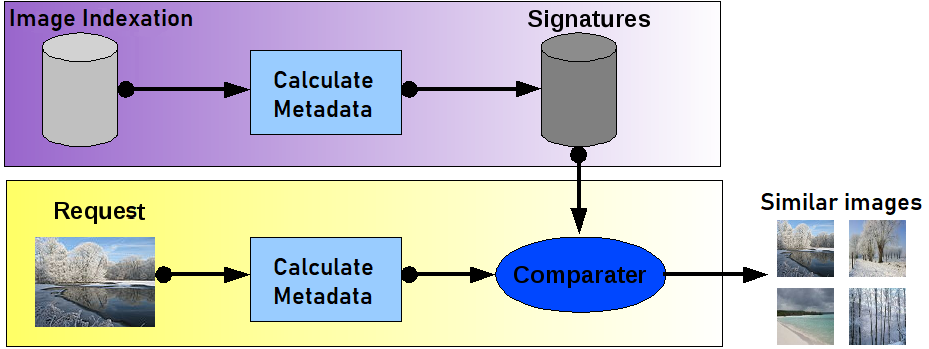

## <p style="color:blue">Color Feature Extraction </p>

### <p style="color:green"> Original Image </p>

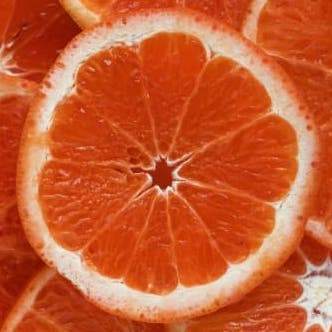

In [1]:
from PIL import Image, ImageOps
img = Image.open('img.jpg')
img

In [2]:
img_converted = img.convert('YCbCr')

In [3]:
y, cb, cr = img_converted.split()

In [4]:
import imageio
import scipy.ndimage as nd
import numpy as np

In [5]:
from skimage import feature

In [6]:
edges1 = feature.canny(np.array(y), sigma = 2)

In [7]:
edges1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [8]:
edges1 = Image.fromarray(np.uint8(edges1)*255)

### <p style="color:green">Edges of the original Image </p>

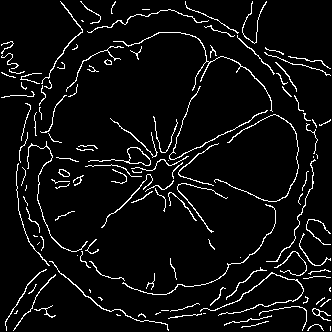

In [9]:
edges1

In [10]:
img = Image.merge('YCbCr', [edges1, cb, cr])

In [11]:
#img.show()

In [12]:
img_converted = img.convert('RGB')

### <p style="color:green">YCbCr Image </b>

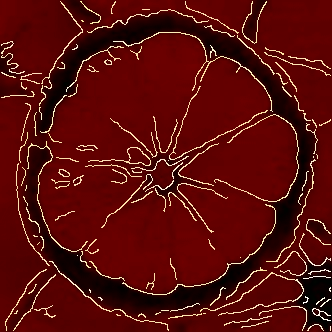

In [13]:
img_converted

In [14]:
r, g, b = img_converted.split()

In [15]:
hr = np.histogram(r, bins=256, range=None, normed=None, weights=None, density=None)
hg = np.histogram(g, bins=256, range=None, normed=None, weights=None, density=None)
hb = np.histogram(b, bins=256, range=None, normed=None, weights=None, density=None)

In [16]:
from pywt import wavedec
cHr = wavedec(hr[0], 'db1', level=2)
cHg = wavedec(hg[0], 'db1', level=3)
cHb = wavedec(hb[0], 'db1', level=3)

In [17]:
Fr = cHr[0].tolist()
Fg = cHg[0].tolist()
Fb = cHb[0].tolist()

In [18]:
import itertools

In [19]:
F_img1 = np.array(list(itertools.chain(*[Fr, Fg, Fb])))

In [20]:
img = Image.open('img.jpg')

In [21]:
img = ImageOps.grayscale(img)

### <p style="color:green">Grayscale Image </b>

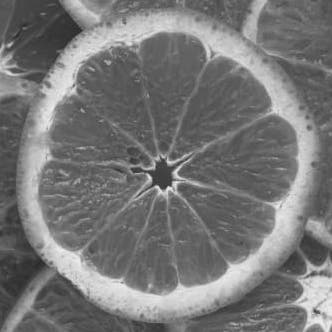

In [22]:
img

In [23]:
from scipy import ndimage
img = ndimage.median_filter(img, size=2)

In [24]:
img = Image.fromarray(np.uint8(img)*255)

### <p style="color:green">Median Filtered Image </p>

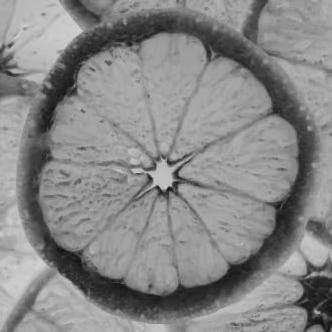

In [25]:
img

### <p style="color:blue"> Color Extraction </p>

In [26]:
def color_extract(Img):
    img =  PIL.Image.open(Img.path)
    img_converted = img.convert('YCbCr')
    y, cb, cr = img_converted.split()
    edges = feature.canny(np.array(y), sigma = 2)
    edges = PIL.Image.fromarray(np.uint8(edges)*255)
    img = PIL.Image.merge('YCbCr', [edges, cb, cr])
    img_converted = img.convert('RGB')
    r, g, b = img_converted.split()
    
    hr = np.histogram(r, bins=256, range=None, normed=None, weights=None, density=None)
    hg = np.histogram(g, bins=256, range=None, normed=None, weights=None, density=None)
    hb = np.histogram(b, bins=256, range=None, normed=None, weights=None, density=None)
    
    cHr = wavedec(hr[0], 'db1', level=2)
    cHg = wavedec(hg[0], 'db1', level=3)
    cHb = wavedec(hb[0], 'db1', level=3)
    
    Fr = cHr[0].tolist()
    Fg = cHg[0].tolist()
    Fb = cHb[0].tolist()
    
    F_img = np.array(list(itertools.chain(*[Fr, Fg, Fb])))
    
    return F_img

### <p style="color:blue"> Shape Extraction </p>

In [27]:
import cv2
import numpy as np

In [28]:
def threshold(img):
    ret,thresh = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
    return thresh

In [29]:
def contour(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [30]:
def rotate(img1, scaleFactor = 1, degreesCCW = 30):
    (oldY,oldX) = img1.shape #note: numpy uses (y,x) convention but most OpenCV functions use (x,y)
    M = cv2.getRotationMatrix2D(center=(oldX/2,oldY/2), angle=degreesCCW, scale=scaleFactor) #rotate about center of image.
    newX,newY = oldX*scaleFactor,oldY*scaleFactor
    r = np.deg2rad(degreesCCW)
    newX,newY = (abs(np.sin(r)*newY) + abs(np.cos(r)*newX),abs(np.sin(r)*newX) + abs(np.cos(r)*newY))
    (tx,ty) = ((newX-oldX)/2,(newY-oldY)/2)
    M[0,2] += tx
    M[1,2] += ty
    rotatedImg = cv2.warpAffine(img1, M, dsize=(int(newX),int(newY)))
    return rotatedImg

In [31]:
def rotinv(cnt,img):
    if len(cnt) < 5:
        return img
    ellipse = cv2.fitEllipse(cnt)
    angle = ellipse[2]
    if(90-angle>-45):
        rot_image = rotate(img,1,90-angle)
    else:
        rot_image = rotate(img,1,90-angle)
    return rot_image

In [32]:
def cropit(img,cnt):
    x,y,w,h = cv2.boundingRect(cnt)
    crop = img[y:y+h,x:x+w]
    return crop

In [33]:
def largestcont(contours):
    cnt = contours[0]
    for cont in contours:
        if(cv2.contourArea(cont) > cv2.contourArea(cnt)):
            cnt = cont
    return cnt

In [34]:
def extractBorder(img):
    return cv2.Canny(img,100,200)

In [35]:
def preprocess(img):
    #print(img)
    thresh = threshold(img)
    contours = contour(thresh)
    thresh = threshold(img)
    cnt = largestcont(contours)
    crop = cropit(thresh,cnt)
    rot_image = rotinv(cnt,crop)
    border = extractBorder(rot_image)
    resized_image = cv2.resize(border, (512, 512))
    return resized_image

In [36]:
import pywt
import matplotlib.pyplot as plt
import os
from operator import itemgetter
import time
import sys
import pickle as pickle

In [37]:
def segment(img):
    seg = []
    for i in range(4):
        for j in range(4):
            start = i*128
            start1 = j*128
            end = start+128
            end1 = start1+128
            seg.append(img[start:end,start1:end1])
    return seg

In [38]:
def localfeature(seg):
    ll2=[]
    lh1=[]
    hl1=[]
    hh1=[]
    dwvt=[]
    ht = []
    vt = []

    for i in range(16):
        wp = pywt.WaveletPacket2D(data=seg[i],wavelet='haar',mode='sym')
        lh1.append(wp['v'].data)
        hl1.append(wp['h'].data)
        hh1.append(wp['d'].data)
        level1 = np.hstack((np.vstack((wp['aa'].data,wp['vv'].data)),np.vstack((wp['hh'].data,wp['dd'].data))))
        level2 = np.hstack((np.vstack((wp['aaa'].data,wp['vvv'].data)),np.vstack((wp['hhh'].data,wp['ddd'].data))))
        level3 = np.hstack((np.vstack((wp['aaaa'].data,wp['vvvv'].data)),np.vstack((wp['hhhh'].data,wp['dddd'].data))))
        level4 = np.hstack((np.vstack((wp['aaaaa'].data,wp['vvvvv'].data)),np.vstack((wp['hhhhh'].data,wp['ddddd'].data))))
        level3[:8,:8] = level4
        level2[:16,:16] = level3
        level1[:32,:32] = level2
        ll2.append(level1)
        vt.append(np.vstack((ll2[i],lh1[i])))
        ht.append(np.vstack((hl1[i],hh1[i])))
        dwvt.append(np.hstack((vt[i],ht[i])))
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    subvector = []
    vector = []
    for i in range(16):
        s1.append(np.linalg.svd(ll2[i], compute_uv=False))
        s2.append(np.linalg.svd(hl1[i], compute_uv=False))
        s3.append(np.linalg.svd(lh1[i], compute_uv=False))
        s4.append(np.linalg.svd(hh1[i], compute_uv=False))
        subvector.append(np.vstack((np.vstack((s1[i],s2[i])),np.vstack((s3[i],s4[i])))))
        vector.append(subvector[i])
        vector1 = np.concatenate(vector,axis=0)
        vector1 = np.array(vector1,dtype=int)
    return vector1

In [39]:
def globalfeature(img,gran):
    gloseg = np.zeros((gran,gran),dtype=int)
    displ = 512/gran
    for i in range(gran):
        for j in range(gran):
            start = int(i*displ)
            start1 = int(j*displ)
            end = int(start+displ)
            end1 = int(start1+displ)
            if(img[start:end, start1:end1].any()):
                gloseg[i,j]= 1
    return gloseg

In [40]:
import os
dir = os.getcwd()
imagelocation = dir + "/mango.jpg" #"/home/sahma61/mango.jpg" #Input Image path
indir = dir + "/image"#"/home/sahma61/Content-Based-Image-Retrieval/image" #Directory Path

In [41]:
class Image(object):
    def __init__(self, path):
        self.path = path
        img = cv2.imread(self.path,0)
        imgm = preprocess(img)
        segm = segment(imgm)
        self.glfeature = globalfeature(imgm,16)
        self.llfeature = localfeature(segm)
        self.numberofones = self.glfeature.sum(dtype=int)

In [42]:
def gloDist(gridA,gridB):
    glosim = np.logical_xor(gridA,gridB).sum()
    return glosim/maxiglosim

In [43]:
def locDist(vectorA,vectorB):
    locsim = np.absolute((vectorA-vectorB).sum())
    return locsim/maxilocsim

### <p style="color:blue"> Processing the Images in the Test Folder </p>

In [45]:
import PIL

In [46]:
img = Image(imagelocation)
F_Qimg = color_extract(img)

maxglosim = 0
maxlocsim = 0
maximum = 0
maxcolor = 0
count = 0

start_time = time.time()
print("Processing : ")
for root, dirs, filenames in os.walk(indir):
    print(filenames)
    for f in filenames:
        i1 = Image(indir+'/'+f)
        F_img = color_extract(i1)
        color_sim = np.sum(np.abs(F_Qimg - F_img))
        count = count+1
        perc = (count/len(filenames))  * 100
        sys.stdout.write("\r%d%%" % perc)
        sys.stdout.flush()
        locsim = np.absolute((i1.llfeature-img.llfeature).sum())
        glosim = np.logical_xor(img.glfeature,i1.glfeature).sum()
        distance = locsim+glosim 
        if(glosim>maxglosim):
            gridmax = i1.glfeature
            maxglosim=glosim
        if(locsim>maxlocsim):
            maxlocsim=locsim
            vectormax = i1.llfeature
        if(distance>maximum):
            vectmostdif= i1.llfeature
            gridmostdif = i1.glfeature
            imgmax = i1
            maximum = distance
        if(color_sim>maxcolor):
            maxcolor = color_sim

maxilocsim = np.absolute((vectormax-img.llfeature).sum())

maxiglosim = np.logical_xor(gridmax,img.glfeature).sum()
processed_time = time.time()
print("\nTotal Processing Time : {0:.2f} seconds".format(processed_time-start_time))


Processing : 
['703.jpg', '903.jpg', '8.jpg', '509.jpg', '201.jpg', '3.jpg', '907.jpg', '603.jpg', '307.jpg', '209.jpg', '508.jpg', '7.jpg', '206.jpg', '2.jpg', '407.jpg', '203.jpg', '701.jpg', 'orange2.jpg', '802.jpg', '601.jpg', '301.jpg', '702.jpg', '402.jpg', '504.jpg', '604.jpg', '801.jpg', '503.jpg', '608.jpg', '400.jpg', '708.jpg', '302.jpg', '0.jpg', '409.jpg', '406.jpg', '102.jpg', '304.jpg', '506.jpg', '905.jpg', '403.jpg', '706.jpg', '207.jpg', '600.jpg', '4.jpg', 'mango4.png', '202.jpg', '106.jpg', '901.jpg', '200.jpg', '107.jpg', '109.jpg', '607.jpg', '605.jpg', '602.jpg', '104.jpg', '300.jpg', '902.jpg', '800.jpg', 'mango2.jpg', '303.jpg', '909.jpg', '101.jpg', 'apple2.jpg', 'orange1.jpg', 'mango3.jpg', '804.jpg', '1.jpg', '606.jpg', 'orange5.jpg', 'img.jpg', '105.jpg', '805.jpg', '204.jpg', '408.jpg', 'apple1.jpg', '700.jpg', '906.jpg', '803.jpg', '707.jpg', '900.jpg', '806.jpg', '308.jpg', '108.jpg', '205.jpg', 'orange4.jpeg', '405.jpg', 'apple5.jpg', '305.jpg', '705.jp

### <p style="color:blue"> Score Calculation for the images in the Test Folder </p>

In [50]:
import sys

In [52]:
ranking = []
count = 0

img = Image(imagelocation)
F_Qimg = color_extract(img)

print("\nSearching:")
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        img1 = Image(indir+'/'+f)
        count = count+1
        perc = (count/len(filenames))  * 100
        F_img = color_extract(img1)
        color_sim = (1 - np.sum(np.abs(F_Qimg - F_img))/maxcolor)*100
        sys.stdout.write("\r%d%%" % perc)
        sys.stdout.flush()
        g1 = gloDist(img1.glfeature,img.glfeature)
        l1 = locDist(img1.llfeature,img.llfeature)
        sim = ((2-(g1+l1))/2)*100
        ranking.append([sim,f, color_sim])
search_time = time.time()
print("\nTotal Searching Time : {0:.2f} seconds".format(search_time-processed_time))
print("\nTotal Time : {0:.2f} seconds".format(search_time-start_time))
ranking = sorted(ranking, key=itemgetter(0),reverse=True)
print(ranking)


Searching:
100%
Total Searching Time : 194.12 seconds

Total Time : 288.34 seconds
[[95.68965517241375, 'mango5.jpg', 6.416857109014041], [95.25862068965516, 'mango4.png', 7.9627430366830065], [94.82758620689631, 'orange2.jpg', 0.0], [94.39655172413792, 'mango3.jpg', 42.70461872188454], [94.39655172413788, 'orange1.jpg', 72.60178302535316], [92.24137931034461, 'mango1.jpeg', 5.697760234311877], [90.73275862068931, 'orange4.jpeg', 5.6904905436125475], [90.51724137930933, 'apple1.jpg', 82.2838092777528], [87.71551724137842, '407.jpg', 5.899517372607621], [86.85344827586098, '403.jpg', 5.849855531629267], [86.63793103448161, '402.jpg', 5.897830852232067], [86.42241379310214, '400.jpg', 5.902041656038071], [85.56034482758463, '406.jpg', 5.901230279221137], [85.12931034482627, 'apple2.jpg', 6.037226391432715], [84.05172413792968, '401.jpg', 5.90053764047499], [83.83620689655056, '808.jpg', 5.738571380011326], [83.62068965517088, '405.jpg', 5.902093517719176], [82.75862068965442, '602.jpg',

In [53]:
img_list = []
score_list = []
threshold = 70

In [54]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### <p style="color:blue">Ranking Retrieved Results on the basis of score</p>

In [55]:
i = 1
print("Score")
for elements in ranking:
    if elements[0] < threshold:
        break   
    i += 1
    img = mpimg.imread(indir + '/' + elements[1])
    img = cv2.resize(img, (720, 720))
    img_list.append(img)
    score_list.append('{0:.2f}'.format(elements[0]))
    print(elements)

Score
[95.68965517241375, 'mango5.jpg', 6.416857109014041]
[95.25862068965516, 'mango4.png', 7.9627430366830065]
[94.82758620689631, 'orange2.jpg', 0.0]
[94.39655172413792, 'mango3.jpg', 42.70461872188454]
[94.39655172413788, 'orange1.jpg', 72.60178302535316]
[92.24137931034461, 'mango1.jpeg', 5.697760234311877]
[90.73275862068931, 'orange4.jpeg', 5.6904905436125475]
[90.51724137930933, 'apple1.jpg', 82.2838092777528]
[87.71551724137842, '407.jpg', 5.899517372607621]
[86.85344827586098, '403.jpg', 5.849855531629267]
[86.63793103448161, '402.jpg', 5.897830852232067]
[86.42241379310214, '400.jpg', 5.902041656038071]
[85.56034482758463, '406.jpg', 5.901230279221137]
[85.12931034482627, 'apple2.jpg', 6.037226391432715]
[84.05172413792968, '401.jpg', 5.90053764047499]
[83.83620689655056, '808.jpg', 5.738571380011326]
[83.62068965517088, '405.jpg', 5.902093517719176]
[82.75862068965442, '602.jpg', 5.7495622265029915]
[82.11206896551569, '404.jpg', 5.8795608107124036]
[81.89655172413613, '409

### <p style="color:green">Query Image</p>

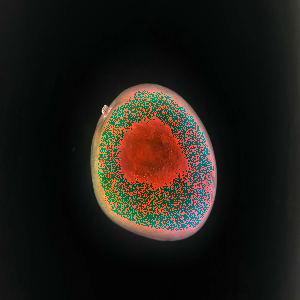

In [56]:
import PIL
img1 = cv2.imread(imagelocation)
img1 = cv2.resize(img1, (300, 300))
img1 = PIL.Image.fromarray(np.uint8(img1)*255)
img1

### <p style="color:green">Top Results with similarity score > 70 </p>

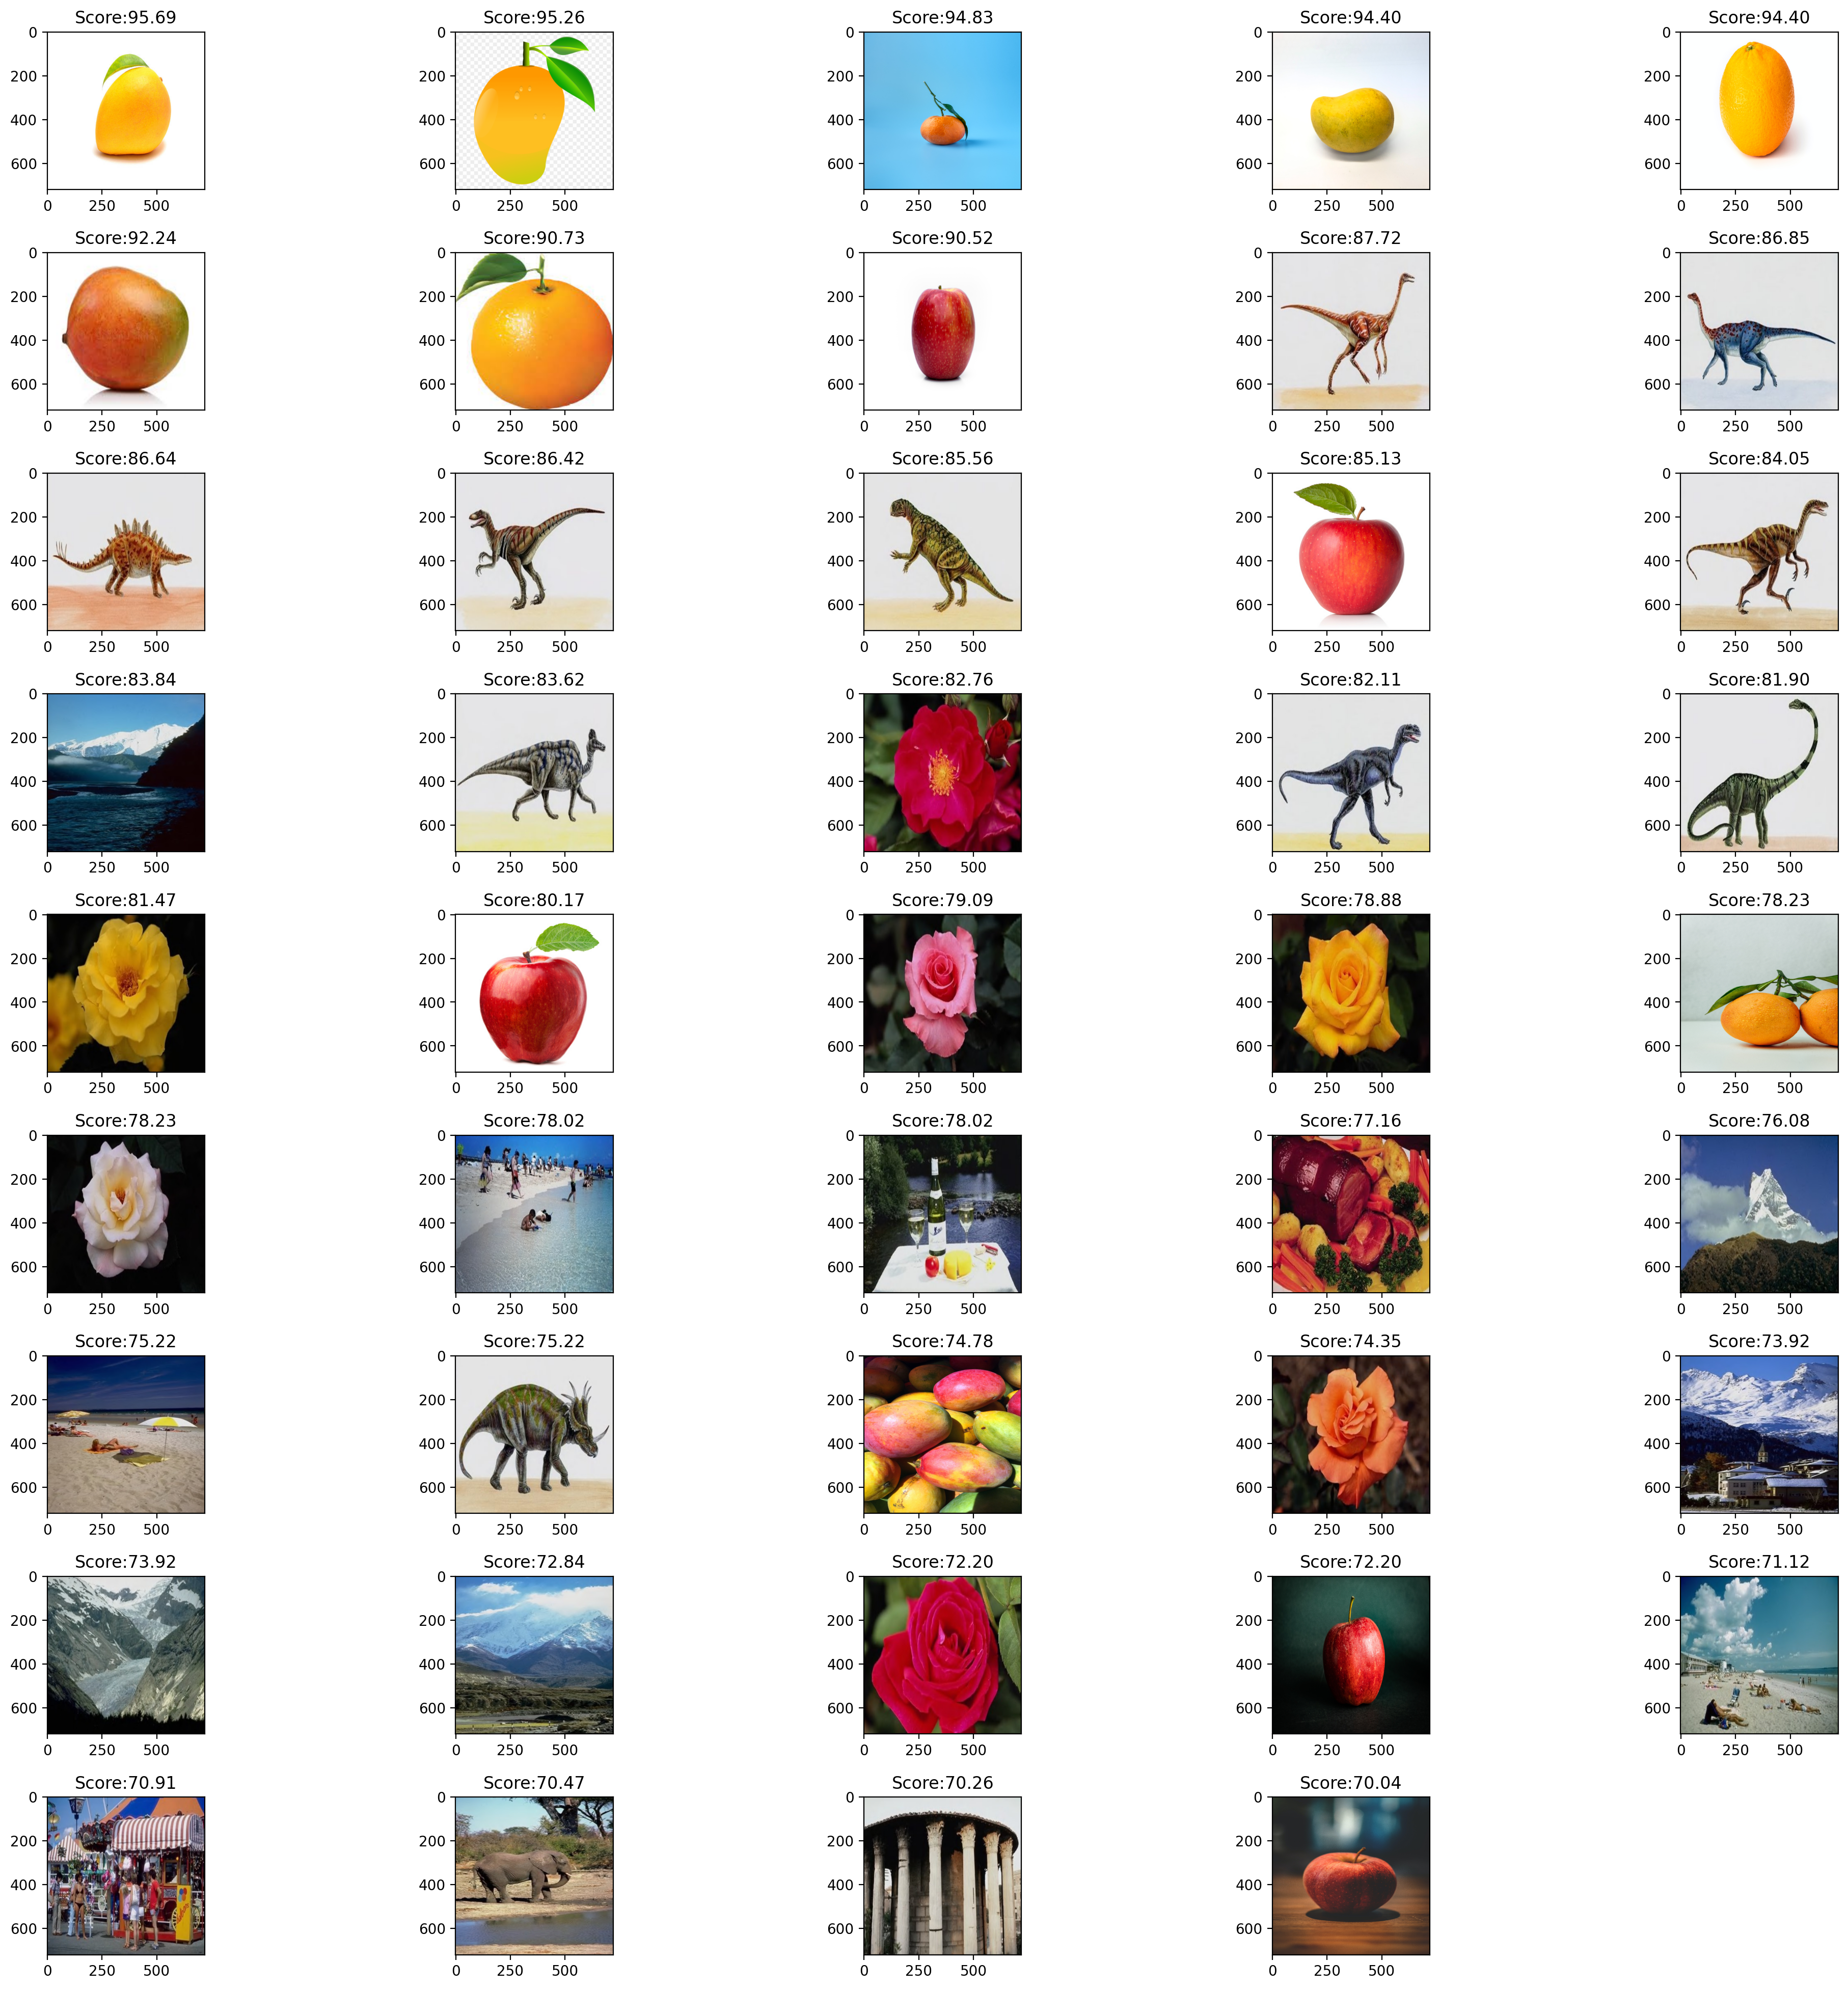

<Figure size 432x288 with 0 Axes>

In [57]:
%matplotlib inline
fig = plt.figure(figsize=(25, 25), dpi=200)
for i in range(len(img_list)):
    img = img_list[i]
    fig.add_subplot(int(np.ceil(len(img_list)/5)), 5, i+1)
    fig.subplots_adjust(hspace=0.4)
    plt.title(f"Score:{score_list[i]}")
    plt.imshow(img)
plt.show()
plt.savefig("subplot_image")